In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load train and test file
train = pd.read_csv('../data/Train_UWu5bXk.csv')
test = pd.read_csv('../data/Test_u94Q5KV.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


** As you can see we have categorical, ordinal and numerical features, so each one of them need to be handled separately **

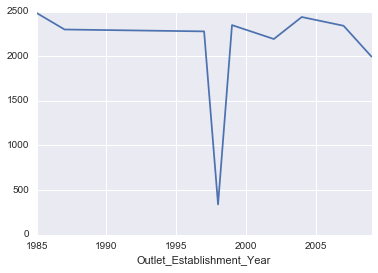

In [51]:
## Let' see how estabilshment year of an outlet year has an impact on sales of that outlet
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot();

** At a initial glance, outlets that were established in 1998 has a suprisingly low sale, need to dig deep into this as to why this is the case **

### Outlet Establishment Year in Train and Test examples

In [5]:
print 'Outlet Establishment Years in Training Examples %s ' %(np.sort(train.Outlet_Establishment_Year.unique()))
print 'Outlet Establishment Years in Test Examples %s ' %(np.sort(test.Outlet_Establishment_Year.unique()))

Outlet Establishment Years in Training Examples [1985 1987 1997 1998 1999 2002 2004 2007 2009] 
Outlet Establishment Years in Test Examples [1985 1987 1997 1998 1999 2002 2004 2007 2009] 


In [27]:
## create separate dataset for each of those years
data_pre_1990 = train[train.Outlet_Establishment_Year < 1997]
data_1990 = train[(train.Outlet_Establishment_Year >= 1990) & (train.Outlet_Establishment_Year < 2000)]
data_2000 = train[train.Outlet_Establishment_Year >= 2000]

In [29]:
data_pre_1990 = data_pre_1990.set_index(data_pre_1990.Outlet_Establishment_Year)
data_1990 = data_1990.set_index(data_1990.Outlet_Establishment_Year)
data_2000 = data_2000.set_index(data_2000.Outlet_Establishment_Year)

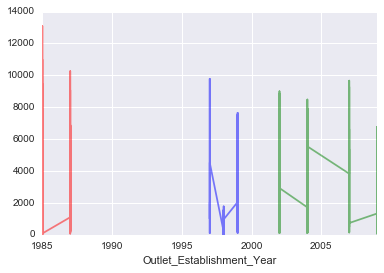

In [30]:
data_pre_1990.sort_index().Item_Outlet_Sales.plot(color='r', alpha=0.5)
data_1990.sort_index().Item_Outlet_Sales.plot(color='b', alpha=.5)
data_2000.sort_index().Item_Outlet_Sales.plot(color='g', alpha=.5);

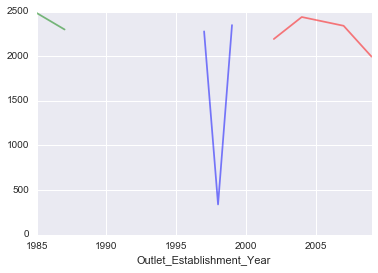

In [33]:
data_pre_1990.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(color='g', alpha=0.5)
data_1990.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(color='b', alpha=0.5)
data_2000.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(color='r', alpha=0.5);

** As there are very few examples no conclusions can be drawn as of now **

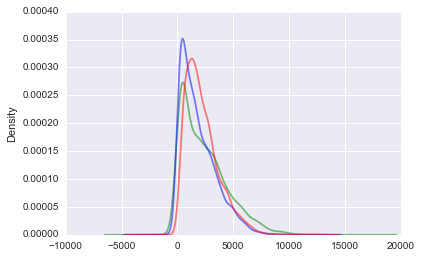

In [54]:
ax = data_pre_1990.Item_Outlet_Sales.plot(kind='kde', color='g', alpha=.5)
data_1990.Item_Outlet_Sales.plot(kind='kde', color='b', alpha=.5)
data_2000.Item_Outlet_Sales.plot(kind='kde', color='r', alpha=.5);

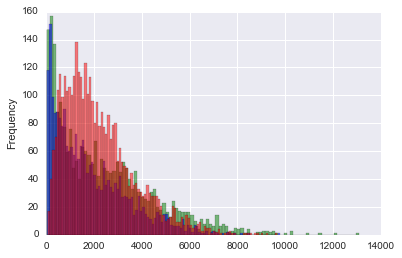

In [56]:
ax = data_pre_1990.Item_Outlet_Sales.plot(kind='hist', bins=100, color='g', alpha=.5)
data_1990.Item_Outlet_Sales.plot(kind='hist', bins=100, color='b', alpha=.5)
data_2000.Item_Outlet_Sales.plot(kind='hist', bins=100, color='r', alpha=.5);

### Lets see if item type has any effect on its sales

In [40]:
print 'Number of unique types of items in training examples \n %s \n' %train.Item_Type.unique()
print 'Number of unique types of items in test examples \n%s' %test.Item_Type.unique()

Number of unique types of items in training examples 
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Number of unique types of items in test examples 
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


In [48]:
train.groupby('Item_Type').Item_Outlet_Sales.mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

** Starchy Foods leads the way in sales count **

## Sales across different outlets

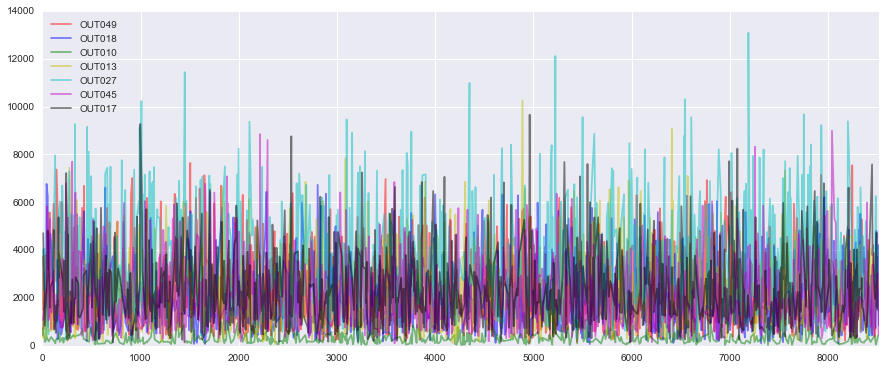

In [69]:
colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']

for i, s in enumerate(train.Outlet_Identifier.unique()[:7]):
    train[train.Outlet_Identifier == s].Item_Outlet_Sales.plot(c=colors[i], figsize=(15, 6), label=s, alpha=.5)

plt.legend(loc='best');

** Stores have varying sales **

In [70]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [73]:
data_OUT049 = train[train.Outlet_Identifier == 'OUT049']
data_OUT018 = train[train.Outlet_Identifier == 'OUT018']
data_OUT010 = train[train.Outlet_Identifier == 'OUT010']
data_OUT013 = train[train.Outlet_Identifier == 'OUT013']
data_OUT027 = train[train.Outlet_Identifier == 'OUT027']
data_OUT045 = train[train.Outlet_Identifier == 'OUT045']
data_OUT017 = train[train.Outlet_Identifier == 'OUT017']
data_OUT035 = train[train.Outlet_Identifier == 'OUT035']
data_OUT019 = train[train.Outlet_Identifier == 'OUT019']

### Correlation between item type and sales for  a particular store

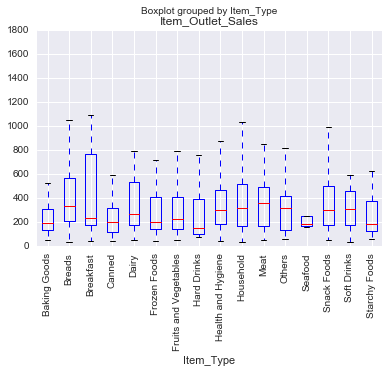

In [76]:
data_OUT010.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

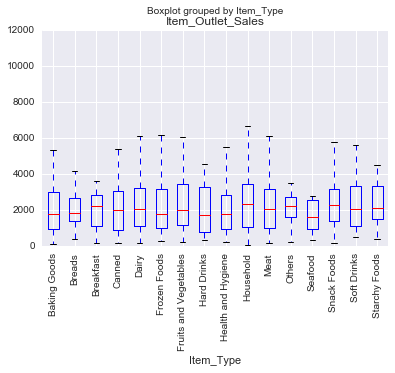

In [78]:
data_OUT013.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

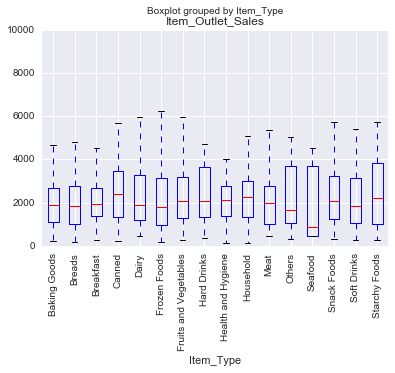

In [79]:
data_OUT017.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

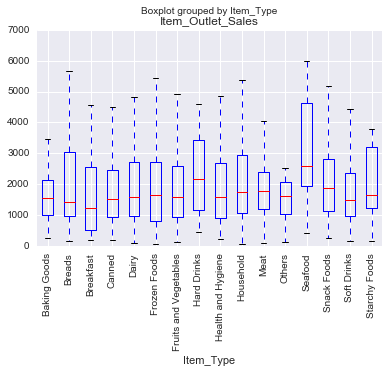

In [80]:
data_OUT018.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

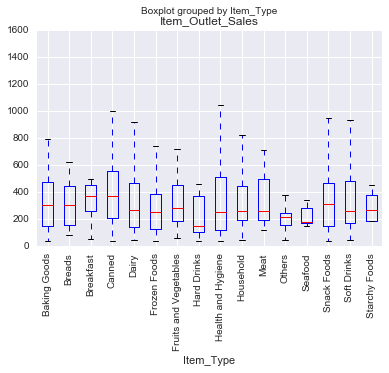

In [81]:
data_OUT019.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

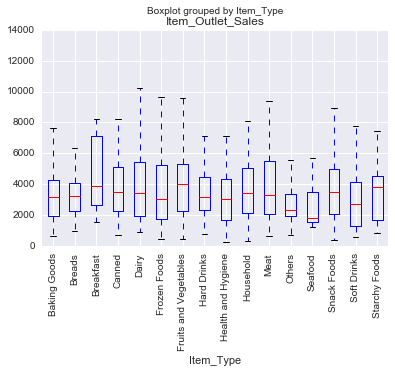

In [82]:
data_OUT027.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

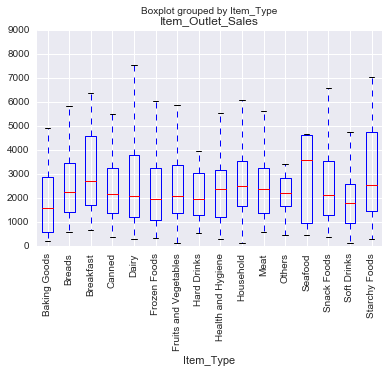

In [83]:
data_OUT035.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

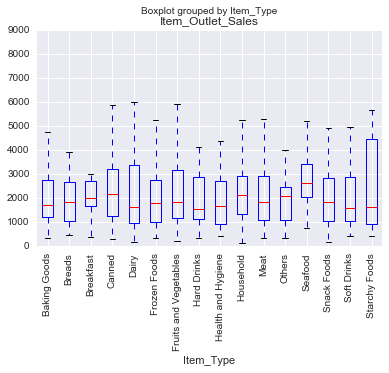

In [84]:
data_OUT045.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

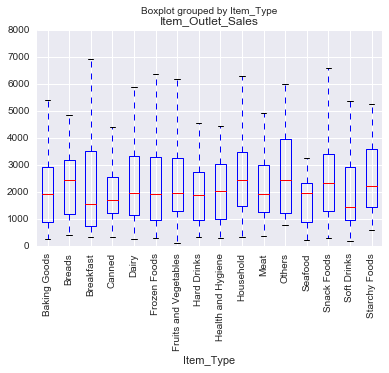

In [85]:
data_OUT049.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

## Analysis of item visibility with item outlet sales

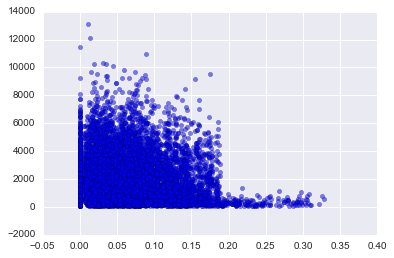

In [87]:
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, alpha=.5);

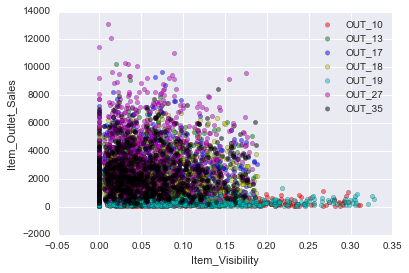

In [94]:
ax = data_OUT010.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='OUT_10')
data_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='OUT_13')
data_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='OUT_17')
data_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.5, label='OUT_18')
data_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.5, label='OUT_19')
data_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.5, label='OUT_27')
data_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.5, label='OUT_35')
plt.legend(loc='best');

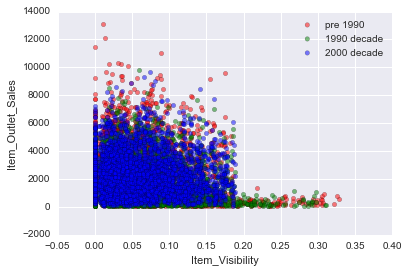

In [91]:
ax = data_pre_1990.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='pre 1990')
data_1990.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='1990 decade')
data_2000.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='2000 decade')
plt.legend(loc='best');

### Correlation between item prices and sales

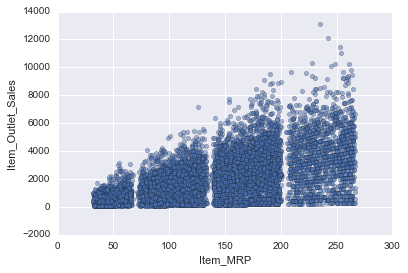

In [97]:
train.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5);

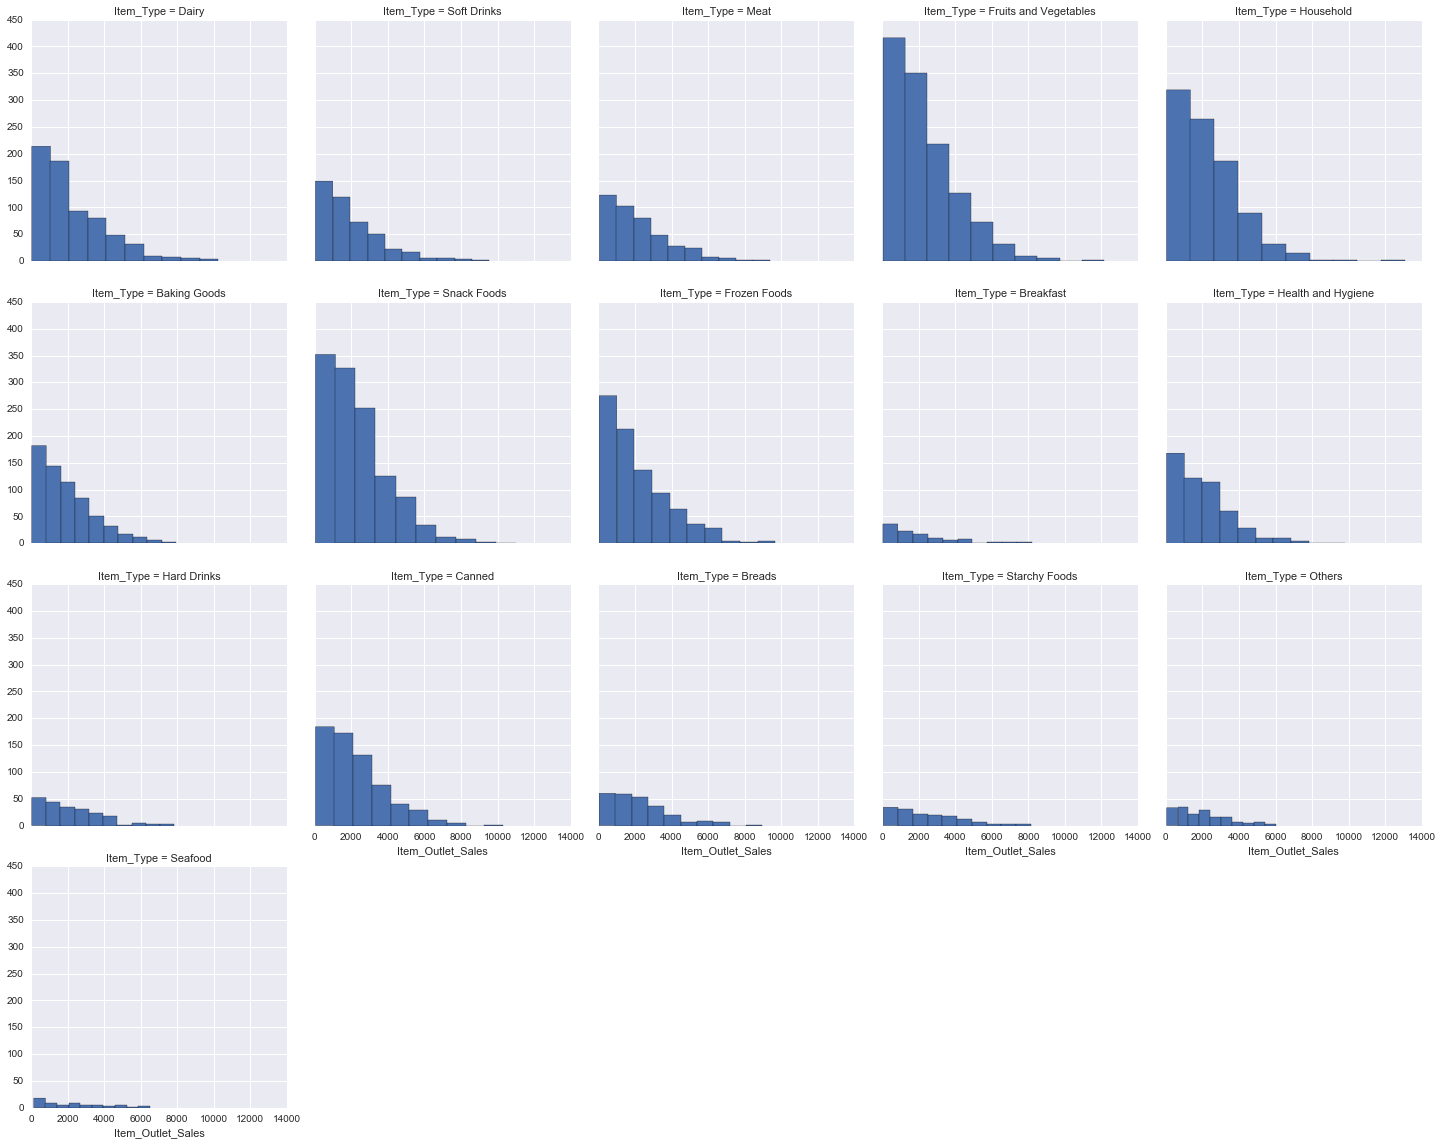

In [112]:
sns.FacetGrid(train, col='Item_Type', size=4, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

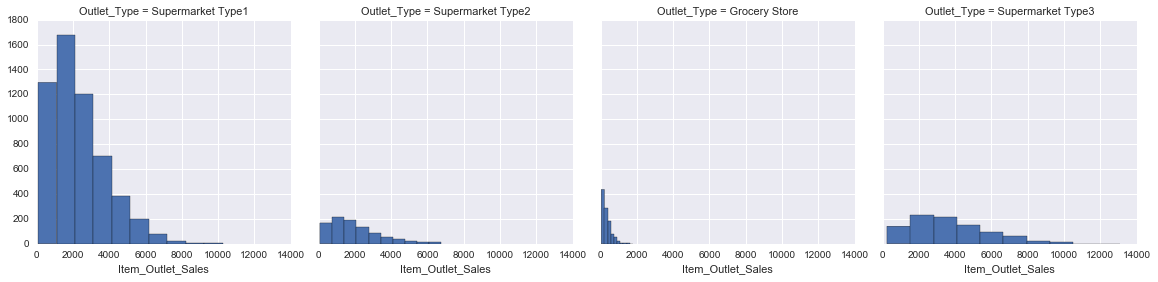

In [114]:
sns.FacetGrid(train, col='Outlet_Type', size=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

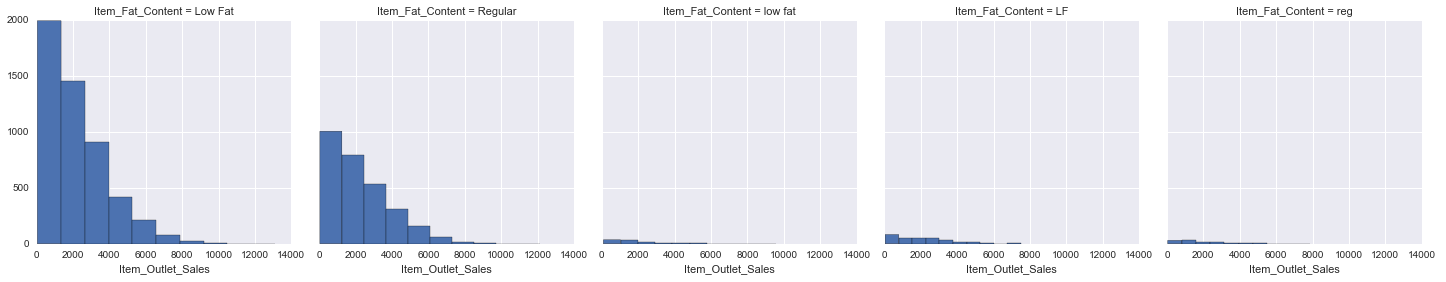

In [115]:
sns.FacetGrid(train, col='Item_Fat_Content', size=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

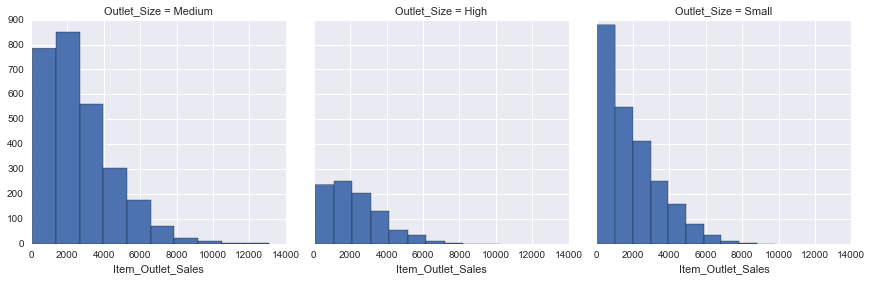

In [116]:
sns.FacetGrid(train, col='Outlet_Size', size=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

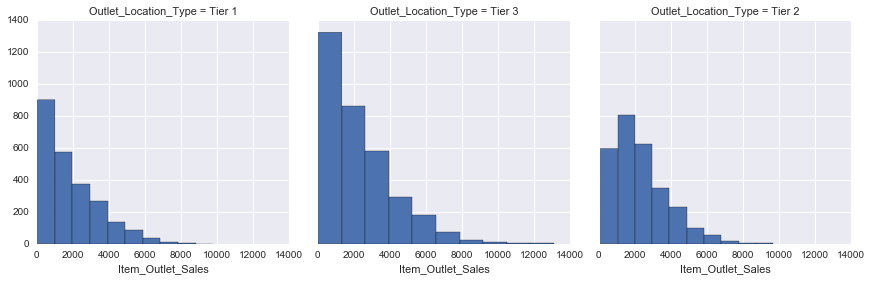

In [118]:
sns.FacetGrid(train, col='Outlet_Location_Type', size=4) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

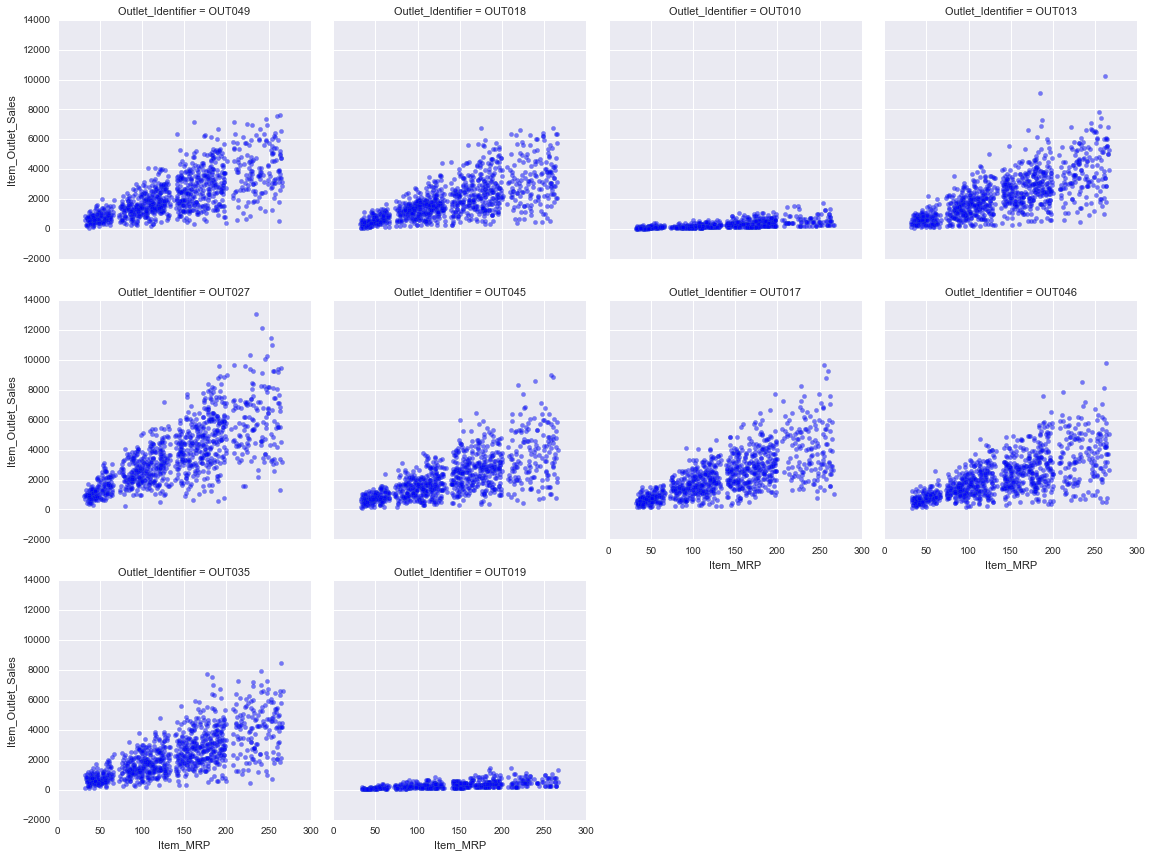

In [120]:
sns.FacetGrid(train, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales', c='b', alpha=0.5) \
    .add_legend();

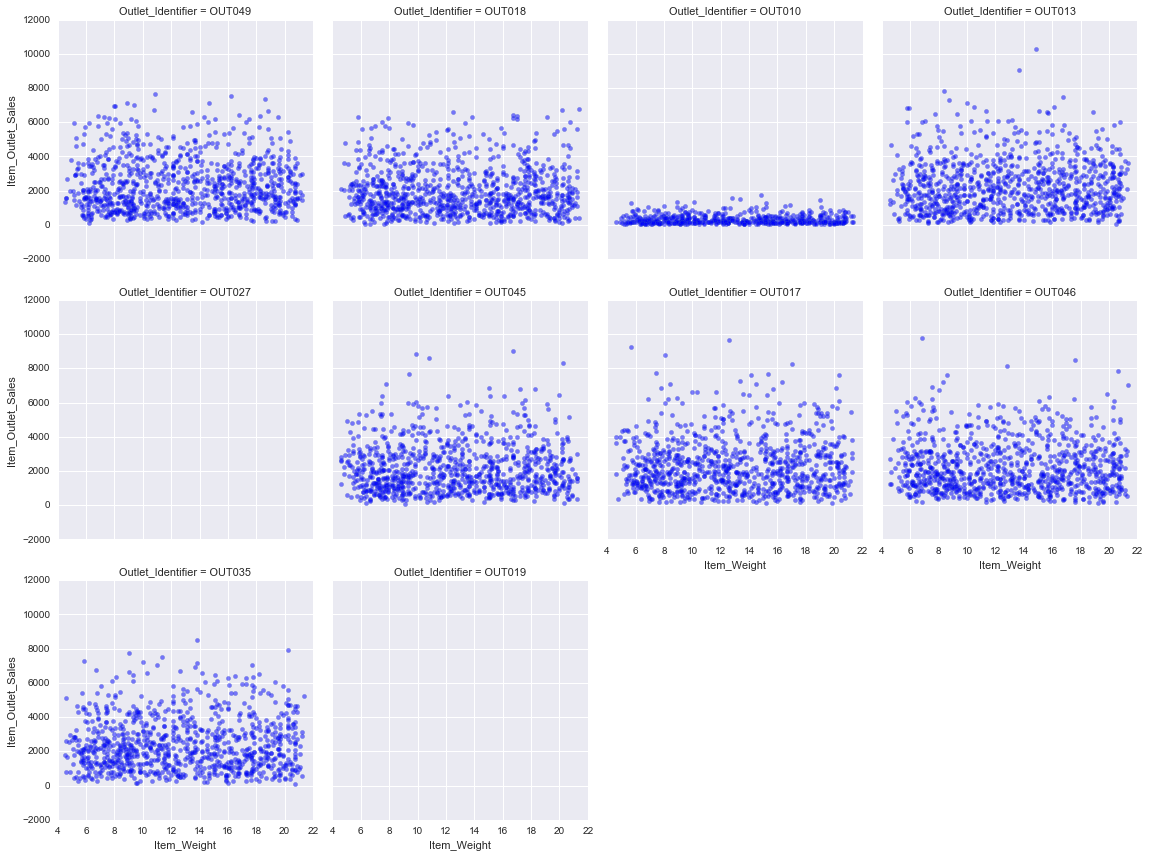

In [121]:
sns.FacetGrid(train, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_Weight', 'Item_Outlet_Sales', c='b', alpha=0.5) \
    .add_legend();

In [127]:
set(test.Item_Identifier) - set(train.Item_Identifier)

set()

** So all the items for which we have to predict sales are in the training set. **